In [ ]:
# Import das bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Funções
def imgShow(img, nome):
    # Mostra a imagem
    cv2.imshow(nome, img)
    # Espera que uma tecla seja pressionada
    cv2.waitKey(0)
    # Limpa a instância do opencv
    img.release()
    # Fecha a janela
    cv2.destroyAllWindows()

def mostraInfos(img):
    # Mostra imagem
    print("Matriz da imagem:")
    print (img)
    # Mostra as informações da imagem
    print("Informações da imagem:")
    print (img.shape)
    # Mostra o tipo da imagem
    print("Tipo da imagem:")
    print (type(img))

def threshold_binary(img, min, max):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ret, thresh = cv2.threshold(gray, min, max, cv2.THRESH_BINARY)
    return thresh

# def capShow(cap):

    

## 1. Leitura de imagens

In [ ]:
# Começa com a leitura da imagem
img = cv2.imread('./media/memes.jfif')
# # A imagem é composta por 3 matrizes, uma camada azul, uma verde e outra vermelha, para RGB
print (img)
# # Imprime uma tupla com a altura, largura e quantidade de camadas da imagem
# # 597 pixels de altura, 599 pixels de largura e 3 camadas de imagem
print (img.shape)
print (type(img))
# # Script comumente usando para visualizar a imagem
# # Método que mostra a imagem
cv2.imshow('image', img)
# # Key para quando pressionada feche a imagem
cv2.waitKey(0)
# # Método para fechar a imagem quando a tecla for pressionada
cv2.destroyAllWindows()

In [ ]:
# Adicionando uma flag de leitura em preto e branco
img2 = cv2.imread('./media/memes.jfif', cv2.IMREAD_GRAYSCALE)

mostraInfos(img2)
imgShow(img2, 'imagem')

# Salvar a imagem no disco, é possível ler em um formato e salvar em outro
cv2.imwrite('output.jpg', img2)

## 2. Personalizando a imagem

In [ ]:
# Desenhar nas imagens:
img3 = cv2.imread('./media/memes.jfif')
# Desenhar uma linha
# Passa primeiro a imagem, em seguida a coordenada de inicio, coordenada final, cor, espessura da linha
# O plano cartesionado funciona normal para o eixo x e o crescente do y é para baixo:
cv2.line(img3, (0,0), (100,100), (255,255,255), 15)
# imgShow(img3)

# Desenhar shapes
# Desenhar um retângulo, mesmos args da linha
img4 = cv2.imread('./media/memes.jfif')
cv2.rectangle(img4, (0,0), (100,100), (180,40,30), 15)
# imgShow(img4)

# Desenhar pontos
img5 = cv2.imread('./media/memes.jfif')
pts = np.array([[10,5], [20,30], [100,140]], np.int32)
# Recebe uma imagem, um array com os pontos, para fechar o ultimo ponto com os primeiros, chamamos True, recebe cor e a borda
# cv2.polyLines(img5, [pts], True, (0,255,0), 15)
# imgShow(img5)

# Desenhar circulo
img6 = cv2.imread('./media/memes.jfif')
# cv2.circle(img6, (0,0), (100,100), (180,40,30), 15)
# imgShow(img6)

## 3. Leitura de vídeo

In [ ]:
# Para armazenar o vídeo em uma variável
cap = cv2.VideoCapture('./media/video.mp4')
# Para ler a webcam chama-se o index
cap2 = cv2.VideoCapture(0)
# Para ler a captura
while(True):
    ok, frame = cap.read()
    # Se a imagem não tiver sido lida, o programa vai parar
    if not ok:
        break
    cv2.imshow('frame', frame)
    # Aqui ele espera por um evento do teclado, e responde em 100 ms, o ord('q') faz com que quando o q seja pressionado o programa pare
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Limpa o vídeo da memória
cap.release()

## 4. Lendo a WebCam

In [ ]:
n = 0
# Lendo a webcam
while(True):
    ok2, frame2 = cap2.read()
    # Se a imagem não tiver sido lida, o programa vai parar
    if not ok2:
        break
    # Imprime um texto na imagem em todos os frames da imagem
    cv2.putText(frame2, 
               'Hello world', 
               (100, 50), 
               cv2.FONT_ITALIC, 
               1, 
               (15,30,40), 
               cv2.LINE_4)
    n = n + 1
    # Imprimir a quantidade de frames, atualizando a string de frame-a-frame
    cv2.putText(frame2, 
               str(n), 
               (150, 50), 
               cv2.FONT_ITALIC, 
               1, 
               (150,40,150), 
               cv2.LINE_4)
    # A leitura das cores é (B,G,R)
    cv2.imshow('frame', frame2)
    # Aqui ele espera por um evento do teclado, e responde em 100 ms, o ord('q') faz com que quando o q seja pressionado o programa pare
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap2.release()
cv2.destroyAllWindows()

## 5. Gravando e armazenando vídeo

In [17]:
# Essa condição é importante para processar um vídeo que roda por um algoritmo e não seja real time
cap = cv2.VideoCapture(0)
# Cria um codec de processamento, simples mas eficaz no windows
codec = cv2.VideoWriter_fourcc(*'XVID') # type: ignore
# Salva o vídeo, nome, codec, taxa de processamento, tamanho
writer = cv2.VideoWriter('out.avi', codec, 20, (640,480))
while(True):
    ok, frame = cap.read()
    if not ok:
        break
    # Escreve o video no frame
    # Basicamente o que ele tá fazendo aqui é gerando um vídeo e salvando ele em uma matriz
    writer.write(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
writer.release()
cv2.destroyAllWindows()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'VideoWriter'
> Overload resolution failed:
>  - Argument 'fourcc' is required to be an integer
>  - VideoWriter() missing required argument 'frameSize' (pos 5)
>  - VideoWriter() missing required argument 'params' (pos 5)
>  - VideoWriter() missing required argument 'frameSize' (pos 5)


## 6. Recorte

In [ ]:
matrix = np.array([
    [1,2,3,4,5,6,7,8,9],
    [10,20,30,40,50,60,70,80,90],
    [100,200,300,400,500,600,700,800,900],
    [1000,2000,3000,4000,5000,6000,7000,8000,9000]
])
# Vai retornar as linas de 0 a 2 sem entrar a 2 e o indice 4
croped = matrix[0:2,4]
print(croped)
img = cv2.imread('./memes.jfif')
cv2.imshow('image', img)
cv2.waitKey(0)
# Eixo Y, Eixo X
croped2 = img[100:400, 50:400]
cv2.imshow('image', croped2)
cv2.waitKey(0)
# E se eu quisesse começar em um ponto e ele fizesse a leitura de 500px a partir daquele ponto
y = 100
h = 500 # Altura
x = 50
w = 400 # Largura
# Supondo que os pontos iniciais foram pegues através de uma feature
croped3 = img[y:y+h, x:x+w]
cv2.imshow('image', croped3)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7. Operações matemáticas

In [ ]:
def show(img):
    plt.imshow(img)
    plt.show()

In [ ]:
img = cv2.imread('./media/memes.jfif')
show(img)
# Percebe-se que as tonalidades da imagem são diferentes
# O openCV lê em BGR, enquanto o matplot lê em RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(img2)

In [ ]:
# Mostra as cores em determinado pixel
img[55,55]

In [ ]:
# Substitui as cores de um pixel por outras cores
img2[55,55] = np.array([0,0,0])
show(img2)

In [ ]:
# Substitui em um intervalo
img2[100:300, 100:200] = [255, 255, 255]
show(img2)

In [ ]:
# Soma duas imagens
res = img * img2
show(res)
# Subtrai duas imagens
res2 = img2 - img
show(res2)
# Soma duas imagens
res = cv2.add(img, img2)
show(res)

## 8. Thresholding

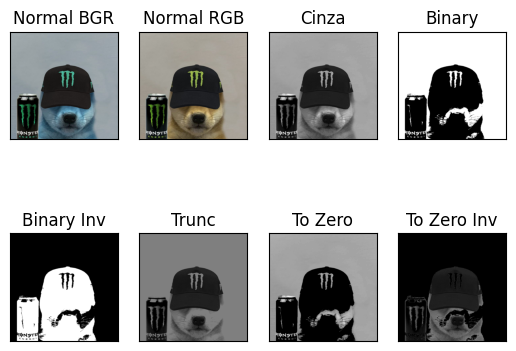

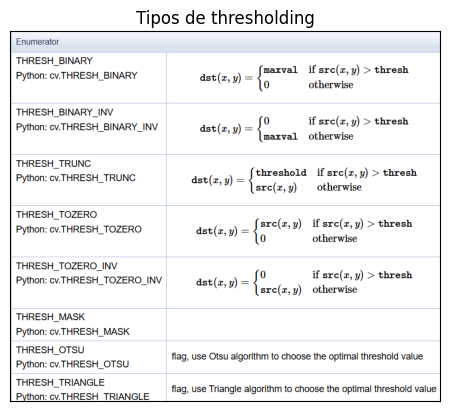

In [9]:
import cv2
import matplotlib.pyplot as plt

# Threshold (limiarização) é uma técnica de processamento de imagens que consiste em separar pixels de uma imagem em duas categorias distintas, normalmente preto e branco, a partir de um valor limiar. Esse valor é escolhido com base em características da imagem que se deseja destacar ou ignorar.

# Importa imagem
res = cv2.imread('./media/memes.jfif')

# Converte de BGR para gray
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Converte a imagem para gray a partir da leitura dela
gray2 = cv2.imread('./media/memes.jfif' , cv2.IMREAD_GRAYSCALE)

min = 127
max = 255

# Aplicando o Thresholding
#ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# pixel, variável = cv2.threshold(imagem_cinza, menor valor de cor, maior valor de cor, tipo de threshold)
ret, thresh1 = cv2.threshold(gray, min, max, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, min, max, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, min, max, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, min, max, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, min, max, cv2.THRESH_TOZERO_INV)

# Convertendo BGR para RBG para que o matplot imprima
res2 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

titles = ['Normal BGR', 'Normal RGB', 'Cinza', 'Binary', 'Binary Inv', 'Trunc', 'To Zero', 'To Zero Inv']
imgs = [res, res2, gray, thresh1, thresh2, thresh3, thresh4, thresh5]


for i in range(len(imgs)):
    plt.subplot(2,4,i+1)
    plt.imshow(imgs[i], 'gray', vmin = 0, vmax = 255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# cv2.imshow('normal', imgs[0])
# cv2.imshow('imagem', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

thresh_types_bgr = cv2.imread('./media/thresholding_types.png')
thresh_types = cv2.cvtColor(thresh_types_bgr, cv2.COLOR_BGR2RGB)
plt.subplot(1,1,1)
plt.imshow(thresh_types, 'gray')
plt.title('Tipos de thresholding')
plt.xticks([]),plt.yticks([])
plt.show()

### 8.1. Filtros

In [ ]:
import cv2
import matplotlib.pyplot as plt

min = 127
max = 255

def threshold_binary(gray, min, max):
    ret, thresh = cv2.threshold(gray, min, max, cv2.THRESH_BINARY)
    return thresh

img = cv2.imread('./media/memes.jfif', cv2.IMREAD_GRAYSCALE)
thresh = threshold_binary(img, min, max)

# Incrementa um borrão na imagem, 5, 7, 9, ..., n
img2 = cv2.medianBlur(img, 9)


# Os filtros são utilizados para realçar ou suavizar caracteristícas de uma imagem. 

# Filtro Gaussiano: reduz ruídos, suaviza a imagem e retira detalhes desnecessários.
blur = cv2.GaussianBlur(thresh, (5,5), 0)
# Parâmetros:
# void cv::GaussianBlur	(	InputArray 	src,
#                             OutputArray dst,
#                                  Size ksize,
#                                 double sigmaX,
#                                 double sigmaY = 0,
#                                 int borderType = BORDER_DEFAULT,
#                                 AlgorithmHint hint = cv::ALGO_HINT_DEFAULT 
# )

# blur = cv2.GaussianBlur(thresh, )

titles = ['Cinza', 'Thresholding', 'MedianBlur', 'GaussianBlur']
resultados = [img, thresh, img2, blur]

for i in range(len(resultados)):
    plt.subplot(1,4,i+1)
    plt.imshow(resultados[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


# for i in range(len(resultados)):
#     cv2.imshow(titles[i], resultados[i])


# Filtro Laplaciano: Realça as bordas da imagem
laplacian = cv2.Laplacian(blur, cv2.CV_64F)
# Deve receber a imagem suavizada e um filtro, o utilizado foi padrão 3x3

# cv2.imshow('Threshold', thresh)
cv2.imshow('Filtro Gaussiano', blur)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 8.2. Adaptive Thresholding

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Em casos onde há mais de uma fonte de iluminação pode não ser apropriado colocar um valor global para o Thresholding ([[ret]], thresh = ...), ao invés disso se torna interessante colocar um limiar adaptativo. Onde o algoritmo determina o limite de um pixel com base em uma pequena região ao seu redor. Portanto, obtemos limites diferentes para diferentes regiões da mesma imagem, o que fornece melhores resultados para imagens com iluminação variável.

min = 127
max = 255
blocksize = 11
c = 2

img = cv2.imread('./media/memes.jfif', cv2.IMREAD_GRAYSCALE)

# Threshold binario
ret, th1 = cv2.threshold(img, min, max, cv2.THRESH_BINARY)
# Threshold adaptativo
th2 = cv2.adaptiveThreshold(img, max, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blocksize, c)
th3 = cv2.adaptiveThreshold(img, max, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blocksize, c)
# blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
# C: Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

titles = ['Cinza', 'Threshold', 'AdaptiveMeanC', 'AdaptiveGaussianC']
images = [img, th1, th2, th3]

for i in range(len(images)):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# cv2.imshow('Imagem', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
    

## 9. Transformações

Diminuir a imagem:

In [ ]:
import cv2

escalaX = 0.5
escalaY = 0.5

img = cv2.imread('./media/transform.jpeg')
# fx e fy são escalas em porcentagem do tamanho real
res = cv2.resize(img, None, fx=escalaX, fy=escalaY, interpolation= cv2.INTER_AREA)
# INTER_AREA = Escolher
# INTER_CUBIC = ampliar (lento)
# INTER_LINEAR = ampliar (rápido)

cv2.imshow('original', img)
cv2.imshow('resized', res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# Desenha em pontos
import cv2
import numpy as np

img = cv2.imread('./media/transform.jpeg')
pts = np.array([[200,5], [20,30], [100,140], [300, 100]], np.int32)
cv2.polylines(img, [pts], True, (0,255,0))

cv2.imshow('Pontos', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
# Armazena coordenadas de pontos definidos pelo usuario

import cv2

img = cv2.imread('./media/transform.jpeg')

points = []
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(points) < 4:
            points.append([x, y])
            cv2.circle(img, (x,y), 5, (255, 0, 0))

cv2.namedWindow('Pontos')
cv2.setMouseCallback('Pontos', draw_circle)

while True:
    cv2.imshow('Pontos', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

print(points)

[]


Transformação de perspectiva:

In [26]:
import cv2
import numpy as np

escalaX = 0.5
escalaY = 0.5

# Ajusta a escala
img = cv2.imread('./media/transform.jpeg')
img = cv2.resize(img, None, None, fx=escalaX, fy=escalaY, interpolation= cv2.INTER_LINEAR)
print(img.shape)

# Recolhe os pontos
points = []
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(points) < 4:
            points.append([x, y])
            cv2.circle(img, (x,y), 5, (255,0,0), -1)

cv2.namedWindow('Pontos')
cv2.setMouseCallback('Pontos', draw_circle)

while (1):
    cv2.imshow('Pontos', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

print(points)

# Ele relaciona os pontos, joga o primeiro ponto para o primeiro ponto do outro vetor
points = np.float32(points)
pts2 = np.float32([[0,0], [450,0], [0,800], [450,800]])

M = cv2.getPerspectiveTransform(points, pts2)
dst = cv2.warpPerspective(img, M, (450,800))

cv2.imshow('Input', img)
cv2.imshow('Output', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()


(800, 450, 3)
[[355, 620], [353, 567], [402, 565], [400, 616]]


## 10. Object Tracking

1. Take each frame of the video
2. Convert from BGR to HSV color-space
3. We threshold the HSV image for a range of blue color
4. Now extract the blue object alone, we can do whatever we want on that image.

In [4]:
import cv2
import numpy as np

# Defina a cor em formato BGR (Blue, Green, Red)
color = np.uint8([[[0, 255, 0]]]) # A matriz agora é 1x1x3

# Converta a cor de BGR para HSV
hsv_color = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)

# Imprima o resultado
print(hsv_color)

[[[ 60 255 255]]]


In [23]:
import cv2
import numpy as np

capture = cv2.VideoCapture(0)

while True:

    # 1. Leitura do vídeo
    _, frame = capture.read()

    # 2. Converte de BGR para HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define a escala das cores do Threshold em escala HSV
    # A ideia é que todas as cores abaixo do intervalo ou acima não estarão sendo indentificadas
    lower_blue = np.array([106,5,102])
    upper_blue = np.array([147,255,255])

    # 3. Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
capture.release()
cv2.destroyAllWindows()

## 11. Erosão

A ideia básica de erosão é apenas como a erosão do solo, ela corrói os limites do objeto em primeiro plano (sempre tente manter o primeiro plano em branco). Então, o que ele faz? O kernel desliza pela imagem (como na convolução 2D). Um pixel na imagem original (1 ou 0) será considerado 1 somente se todos os pixels sob o kernel forem 1, caso contrário, ele será erodido (feito a zero).

Então, o que acontece é que todos os pixels próximos ao limite serão descartados dependendo do tamanho do kernel. Portanto, a espessura ou o tamanho do objeto em primeiro plano diminui ou simplesmente a região branca diminui na imagem

In [7]:
import cv2
import numpy as np

img = cv2.imread('./media/erosion.png', cv2.IMREAD_GRAYSCALE)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Criação do Kernel
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=1)

cv2.imshow('erosion', erosion)
cv2.imshow('imagem', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
kernel = np.ones((5,5), np.uint8)

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    erosion = cv2.erode(thresh, kernel, iterations=1)

    cv2.imshow('Erosion', erosion)
    cv2.imshow('Thresh', thresh)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

## 12. Canny Edge

A detecção de bordas de Canny (Canny Edge Detection) é um dos algoritmos mais populares e amplamente utilizados na visão computacional para a detecção de bordas em imagens. Desenvolvido por John F. Canny em 1986, o objetivo principal desse algoritmo é identificar bordas significativas em uma imagem, ou seja, regiões onde há uma variação abrupta na intensidade de pixels, o que normalmente corresponde aos contornos de objetos.

In [37]:
import cv2
import numpy as np

img = cv2.imread('./media/memes.jfif', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(img,130,200)

cv2.imshow('Canny', edges)
cv2.imshow('Normal', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    edges = cv2.Canny(frame,130,200)

    cv2.imshow('Canny', edges)
    cv2.imshow('Normal', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [3]:
import utils

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    edges = cv2.Canny(frame,130,200)

    cv2.imshow('Canny', edges)
    cv2.imshow('Normal', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()
